In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'yelp_data/health_text_sentiment.csv'
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,1,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
2,4,Dr. Byrne is a great doctor! She has great bed...,0.513333,positive,dr byrne great doctor great bed side manner ex...,0.317778,positive
3,3,I'm raising my review as Dr Bryne's has been m...,-0.035714,negative,raise review dr bryne receptive daughter go an...,0.002806,positive
4,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative


## Split

In [6]:
data = df[['stars','text','clean_text']]

In [7]:
data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
2,4,Dr. Byrne is a great doctor! She has great bed...,dr byrne great doctor great bed side manner ex...
3,3,I'm raising my review as Dr Bryne's has been m...,raise review dr bryne receptive daughter go an...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...


## Select 1& 5 stars only

In [8]:
data = data.ix[np.where((data.stars==1)|(data.stars==5))]
data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...
5,1,I went to the emergency room because i was hav...,go emergency room kidney stone attack emergenc...
6,5,Dr. Byrne is an excellent doctor with all the ...,dr byrne excellent doctor right skill include ...


## binary stars

In [9]:
data.stars.replace(1,0,inplace=True)
data.stars.replace(5,1,inplace=True)

In [10]:
data.head()

,stars,text,clean_text
0,0,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,1,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
4,0,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...
5,0,I went to the emergency room because i was hav...,go emergency room kidney stone attack emergenc...
6,1,Dr. Byrne is an excellent doctor with all the ...,dr byrne excellent doctor right skill include ...


# Multinimial NB

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

## Split Data to test train

In [12]:
review = data['text'].values.astype(str)  # original review
review_clean = data['clean_text'].values.astype(str)  # clean text review
sentiments = data['stars'].values  # star value

X_train, X_test, y_train, y_test = train_test_split(review, sentiments, test_size=0.33, random_state=42)

In [13]:
CountVectorizer?

### `CountVectorizer`
Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.


> Init signature:
```python
CountVectorizer(input='content', encoding='utf-8', decode_error='strict', 
                strip_accents=None, lowercase=True, preprocessor=None, 
                tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', 
                ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, 
                max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
```
Docstring:     
Convert a collection of text documents to a matrix of token counts


In [17]:
# initializing a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')  # count the number of words in the document
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

In [18]:
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '000000', '000mg', '0045', '007', '00a', '00am', '00p', '00pm']


In [15]:
# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

In [16]:
# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)   # we transform the text list to a matrix form

## Classifier

In [19]:
classifier = MultinomialNB()
classifier.fit(count_train, y_train)  # we fit with the X_train_vectorized, not original X_train

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predict

In [20]:
pred = classifier.predict(count_test)

## Accuracy

In [25]:
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

0.9562224980254993


In [26]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred,labels=[0,1])
print(cm)

[[ 6950   291]
 [  485 10000]]


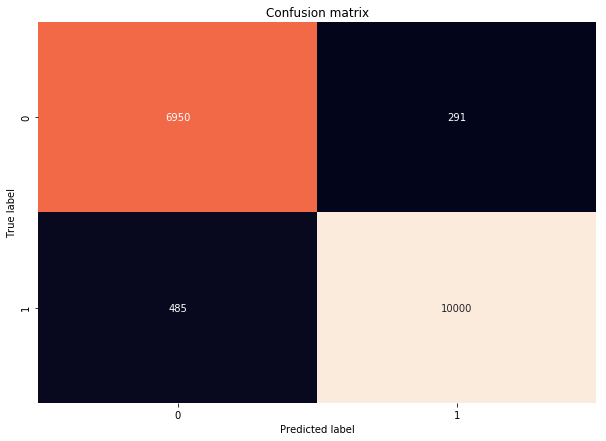

In [29]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7241
           1       0.97      0.95      0.96     10485

   micro avg       0.96      0.96      0.96     17726
   macro avg       0.95      0.96      0.95     17726
weighted avg       0.96      0.96      0.96     17726



## tfidf

In [32]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [33]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=[0,1])
print(cm)

0.9552634548121404
[[ 6754   487]
 [  306 10179]]


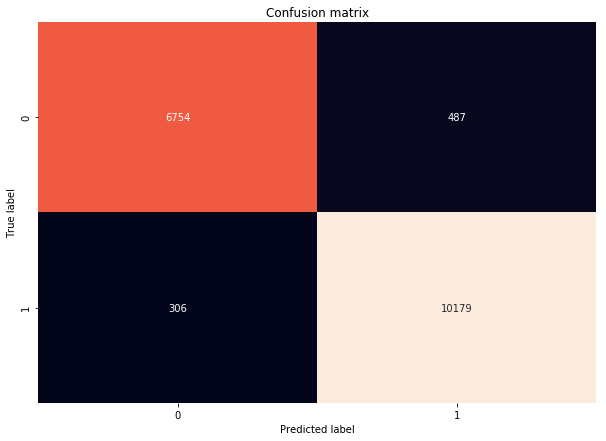

In [34]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Improving model

In [81]:
# Create the list of alphas: alphas
alphas = np.arange(0,1.1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

In [82]:
case_list = {}
for entry in alphas:
    if entry in case_list:
        case_list[entry].append(train_and_predict(entry))
    else:
        case_list[entry] = train_and_predict(entry)

In [88]:
case_list

{0.0: 0.8876791154236714,
 0.1: 0.950863138892023,
 0.2: 0.9531761254654181,
 0.30000000000000004: 0.9546993117454586,
 0.4: 0.955150626198804,
 0.5: 0.9549813832787996,
 0.6000000000000001: 0.9546993117454586,
 0.7000000000000001: 0.9549813832787996,
 0.8: 0.9552634548121404,
 0.9: 0.955489112038813,
 1.0: 0.9552634548121404}

In [50]:
case_list

{0.0: 0.8876791154236714,
 0.1: 0.950863138892023,
 0.2: 0.9531761254654181,
 0.30000000000000004: 0.9546993117454586,
 0.4: 0.955150626198804,
 0.5: 0.9549813832787996,
 0.6000000000000001: 0.9546993117454586,
 0.7000000000000001: 0.9549813832787996,
 0.8: 0.9552634548121404,
 0.9: 0.955489112038813}

In [84]:
alpha_df = pd.DataFrame.from_dict(case_list,orient='index',columns=['result'])

In [85]:
alpha_df

,result
0.0,0.887679
0.1,0.950863
0.2,0.953176
0.3,0.954699
0.4,0.955151
0.5,0.954981
0.6,0.954699
0.7,0.954981
0.8,0.955263
0.9,0.955489


In [90]:
alpha_df.result.max()

0.955489112038813

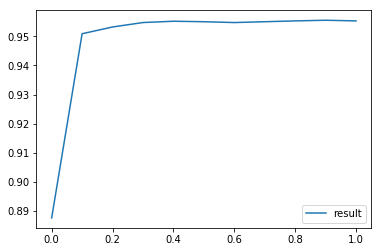

In [86]:
alpha_df.plot()

In [92]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

In [93]:
# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

0 [(-11.911676595813088, '000000'), (-11.911676595813088, '00a'), (-11.911676595813088, '011'), (-11.911676595813088, '016'), (-11.911676595813088, '019'), (-11.911676595813088, '01am'), (-11.911676595813088, '01mg'), (-11.911676595813088, '01pm'), (-11.911676595813088, '02'), (-11.911676595813088, '03pm'), (-11.911676595813088, '045'), (-11.911676595813088, '04am'), (-11.911676595813088, '04pm'), (-11.911676595813088, '05a'), (-11.911676595813088, '05am'), (-11.911676595813088, '05p'), (-11.911676595813088, '05pm'), (-11.911676595813088, '0609'), (-11.911676595813088, '0709'), (-11.911676595813088, '0723')]


In [94]:
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

1 [(-6.095732344851186, 'really'), (-6.0675868251338345, 've'), (-6.065790333963995, 'experience'), (-6.061174502675131, 'nice'), (-6.058323975194042, 'love'), (-6.046786278417638, 'years'), (-5.965922608020813, 'feel'), (-5.958074835757417, 'professional'), (-5.924539875549654, 'highly'), (-5.8823723087846735, 'amazing'), (-5.795122586004513, 'best'), (-5.675040885435804, 'doctor'), (-5.6577152989973305, 'recommend'), (-5.646501764798008, 'office'), (-5.643638992233982, 'care'), (-5.629074934235108, 'time'), (-5.62396624959466, 'friendly'), (-5.320282813267667, 'great'), (-5.26888138179063, 'staff'), (-4.876797948278931, 'dr')]


In [96]:
len(feature_names)

40391

In [98]:
type(feat_with_weights)

list

In [101]:
feat_with_weights[-1]

(-4.876797948278931, 'dr')

In [107]:
nb_classifier.coef_[:]

array([[ -9.43471682, -10.34659138, -11.9116766 , ..., -11.77399361,
        -11.78951334, -11.9116766 ]])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Confusion Matrix deep dive

### Basic terminology
- **True Positives (TP)**: we correctly predicted a positive review
- **True Negatives (TN)**: we correctly predicted that a negative review
- **False Positives (FP)**: we incorrectly predicted a positive review (a "Type I error")
- **False Negatives (FN)**: we incorrectly predicted a negative review (a "Type II error")

In [ ]:
confusion = confusion_matrix(y_test, pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix 

**Classification Accuracy**: Overall, how often is the classifier correct?

In [ ]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, pred))

## Classification Error: Overall, how often is the classifier incorrect?
- Also known as "Misclassification Rate"


In [ ]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, pred))

# Sensitivity: When the actual value is positive, how often is the prediction correct?
- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [ ]:
print(TP / float(TP + FN))
print(recall_score(y_test, pred))

# Specificity: When the actual value is negative, how often is the prediction correct?
- How "specific" (or "selective") is the classifier in predicting positive instances?

In [ ]:
print(TN / float(TN + FP))

**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [ ]:
print(FP / float(TN + FP))

**Precision**: When a positive value is predicted, how often is the prediction correct?
- How "precise" is the classifier when predicting positive instances?

In [ ]:
print(TP / float(TP + FP))
print(precision_score(y_test, pred))

## Clean Text

### Split Data to test train

In [ ]:
review = data['text'].values.astype(str)  # original review
review_clean = data['clean_text'].values.astype(str)  # clean text review
sentiments = data['stars'].values  # star value

X_train, X_test, y_train, y_test = train_test_split(review_clean, sentiments, test_size=0.33, random_state=42)

In [ ]:
vectorizer = CountVectorizer()  # count the number of words in the document
vectorizer.fit(X_train)

In [ ]:
# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

In [ ]:
# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)   # we transform the text list to a matrix form

## Classifier

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)  # we fit with the X_train_vectorized, not original X_train

## Predict

In [ ]:
pred = classifier.predict(X_test_vectorized)

## Accuracy

In [ ]:
nb_nb = classifier.score(X_test_vectorized, y_test)
print(nb_nb)

In [ ]:
print(classification_report(y_test, pred))

## Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Confusion Matrix deep dive

### Basic terminology
- **True Positives (TP)**: we correctly predicted a positive review
- **True Negatives (TN)**: we correctly predicted that a negative review
- **False Positives (FP)**: we incorrectly predicted a positive review (a "Type I error")
- **False Negatives (FN)**: we incorrectly predicted a negative review (a "Type II error")

In [ ]:
confusion = confusion_matrix(y_test, pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix 

**Classification Accuracy**: Overall, how often is the classifier correct?

In [ ]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, pred))

## Classification Error: Overall, how often is the classifier incorrect?
- Also known as "Misclassification Rate"

In [ ]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, pred))

# Sensitivity: When the actual value is positive, how often is the prediction correct?
- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [ ]:
print(TP / float(TP + FN))
print(recall_score(y_test, pred))

# Specificity: When the actual value is negative, how often is the prediction correct?
- How "specific" (or "selective") is the classifier in predicting positive instances?

In [ ]:
print(TN / float(TN + FP))

**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [ ]:
print(FP / float(TN + FP))

**Precision**: When a positive value is predicted, how often is the prediction correct?
- How "precise" is the classifier when predicting positive instances?

In [ ]:
print(TP / float(TP + FP))
print(precision_score(y_test, pred))

In [ ]:
# classifier = MultinomialNB()

# # Train the classifier
# classifier.fit(X_train_vectorized, y_train)  # we fit with the X_train_vectorized, not original X_train

# # Vectorize the test data
# X_test_vectorized = vectorizer.transform(X_test)   # we transform the text list to a matrix form

# preds = classifier.predict(X_train_vectorized)
# # Check our classifier performance
# score = classifier.score(X_test_vectorized, y_test)

# print("Accuracy=", score)

## confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

In [ ]:
train_test_split?

## create a function

In [ ]:
def nlp_MultinomialNB(X,y):
    '''func '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    vectorizer = CountVectorizer()
    vectorizer.fit(X_train)
    X_train_vectorized = vectorizer.transform(X_train)
    classifier = MultinomialNB()

    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)  # we fit with the X_train_vectorized, not original X_train

    # Vectorize the test data
    X_test_vectorized = vectorizer.transform(X_test)   # we transform the text list to a matrix form


    # Check our classifier performance
    score = classifier.score(X_test_vectorized, y_test)
    return score

In [ ]:
review = data['text'].values.astype(str)  # original review
review_clean = data['clean_text'].values.astype(str)  # clean text review
sentiments = data['stars'].values  # star value

In [ ]:
%%time
original = nlp_MultinomialNB(review, sentiments)

In [ ]:
original

In [ ]:
clean = nlp_MultinomialNB(review_clean, sentiments)
clean

## Result Score

In [ ]:
print('Original text:\t  {}'.format(original))
print('Clean text:\t  {}'.format(clean))
print('Difference:\t {}'.format(clean - original))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

In [ ]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))